In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncuExtraGrand/'
npz_name = 'Incucyte256.npz'
npz_val_name = 'Incucyte256Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd29ExtraGRAND.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 256
imagey = 256

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=29, epochs=250, gridx=1, gridy=1, imagex=256, imagey=256, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd29ExtraGRAND.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncuExtraGrand/', npz_name='Incucyte256.npz', npz_val_name='Incucyte256Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 3914
image size (2D):		 (256, 256)
axes:				 SXYC
channels in / out:		 1
number of  images:	 207
image size (2D):		 (256, 256)
axes:				 SXYC
channels in / out:		 1
loading weights
(3914, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3914 samples, validate on 207 samples
Epoch 1/250
3914/3914 [==============================] - 118s 30ms/step - loss: 0.3204 - acc: 0.9808 - val_loss: 0.6083 - val_acc: 0.9565

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.6083375019727698, 'val_acc': 0.9565217230055068, 'loss': 0.320393389503019, 'acc': 0.9808380307442203, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

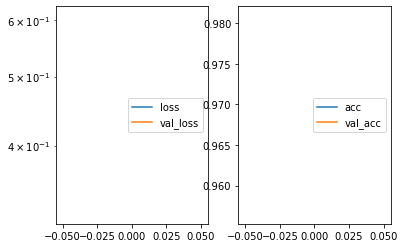

Predicted cell: Cells Probability: [[0.95005184]]
True Cell type: Cells
x [[0.15938729]]
True positional value x 0.4609375
y [[0.59340256]]
True positional value y 0.5390625


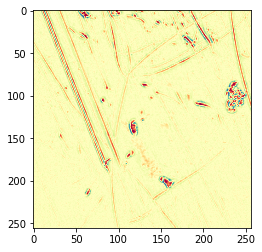

Epoch 2/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3200 - acc: 0.9811 - val_loss: 0.6058 - val_acc: 0.9565

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.6058487857597462, 'val_acc': 0.9565217230055068, 'loss': 0.3200037479705206, 'acc': 0.9810935175108191, 'lr': 1e-06}


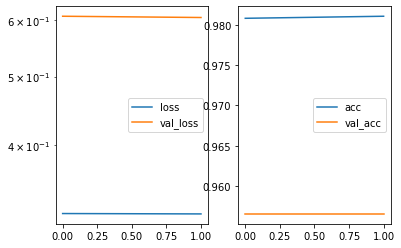

Predicted cell: Cells Probability: [[0.9991924]]
True Cell type: Cells
x [[0.18938991]]
True positional value x 0.4609375
y [[0.3573349]]
True positional value y 0.4609375


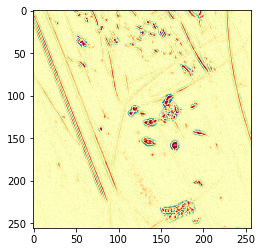

Epoch 3/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3191 - acc: 0.9813 - val_loss: 0.6053 - val_acc: 0.9565

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.6053248672669637, 'val_acc': 0.9565217230055068, 'loss': 0.3191367516909927, 'acc': 0.9813490137495919, 'lr': 1e-06}


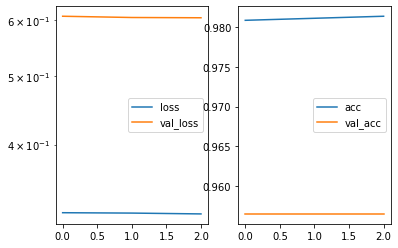

Predicted cell: Cells Probability: [[0.99543935]]
True Cell type: Cells
x [[0.30677623]]
True positional value x 0.5390625
y [[0.48135188]]
True positional value y 0.5


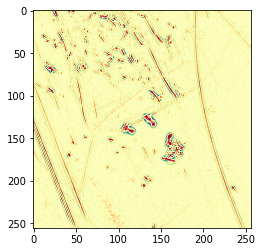

Epoch 4/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3177 - acc: 0.9811 - val_loss: 0.6030 - val_acc: 0.9565

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.6030359504303494, 'val_acc': 0.9565217230055068, 'loss': 0.3176619502647714, 'acc': 0.9810935236022493, 'lr': 1e-06}


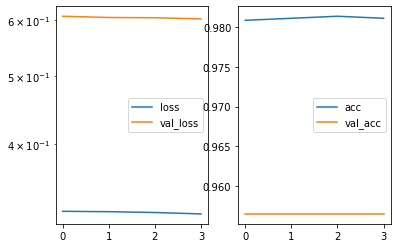

Predicted cell: Cells Probability: [[0.99817777]]
True Cell type: Cells
x [[0.43948784]]
True positional value x 0.5390625
y [[0.7166352]]
True positional value y 0.4609375


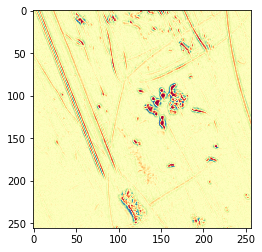

Epoch 5/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3169 - acc: 0.9816 - val_loss: 0.6024 - val_acc: 0.9565

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.6024272323806504, 'val_acc': 0.9565217230055068, 'loss': 0.3169457631477849, 'acc': 0.981604506607621, 'lr': 1e-06}


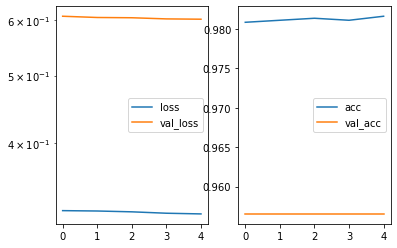

Predicted cell: Cells Probability: [[0.9937243]]
True Cell type: Cells
x [[0.57553333]]
True positional value x 0.5
y [[0.52955556]]
True positional value y 0.4609375


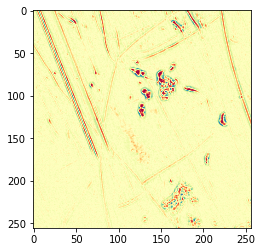

Epoch 6/250
3914/3914 [==============================] - 99s 25ms/step - loss: 0.3165 - acc: 0.9816 - val_loss: 0.6013 - val_acc: 0.9565

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.6012646270834882, 'val_acc': 0.9565217230055068, 'loss': 0.3164862261996564, 'acc': 0.9816045050847634, 'lr': 1e-06}


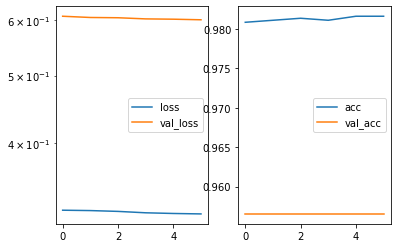

Predicted cell: Normal Probability: [[0.89536923]]
True Cell type: Normal
x [[0.55688405]]
True positional value x 0.5
y [[0.5715614]]
True positional value y 0.5


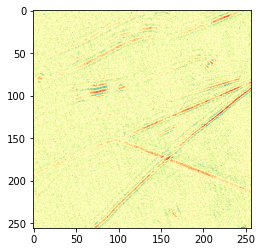

Epoch 7/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3150 - acc: 0.9821 - val_loss: 0.5997 - val_acc: 0.9565

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5996587938732572, 'val_acc': 0.9565217230055068, 'loss': 0.315007997414989, 'acc': 0.982115492323679, 'lr': 1e-06}


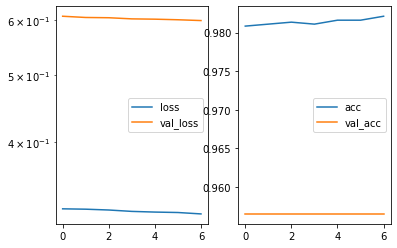

Predicted cell: Cells Probability: [[0.99820566]]
True Cell type: Cells
x [[0.29372877]]
True positional value x 0.5390625
y [[0.36357975]]
True positional value y 0.5


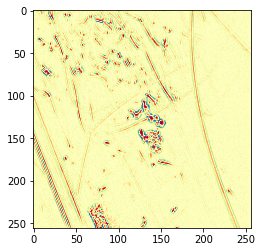

Epoch 8/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3146 - acc: 0.9824 - val_loss: 0.5987 - val_acc: 0.9565

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5987129827628389, 'val_acc': 0.9565217230055068, 'loss': 0.31457967607720383, 'acc': 0.9823709848466794, 'lr': 1e-06}


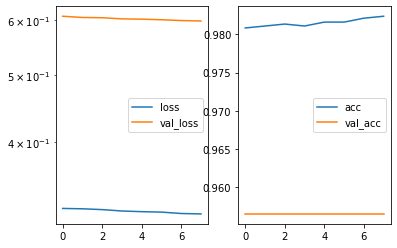

Predicted cell: Cells Probability: [[0.98644596]]
True Cell type: Cells
x [[0.47606847]]
True positional value x 0.5390625
y [[0.58118176]]
True positional value y 0.5390625


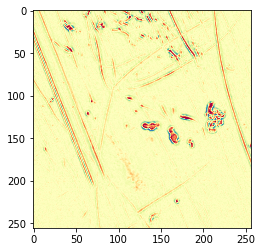

Epoch 9/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3133 - acc: 0.9831 - val_loss: 0.5976 - val_acc: 0.9565

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5975653336243929, 'val_acc': 0.9565217230055068, 'loss': 0.3133135545022279, 'acc': 0.9831374668015104, 'lr': 1e-06}


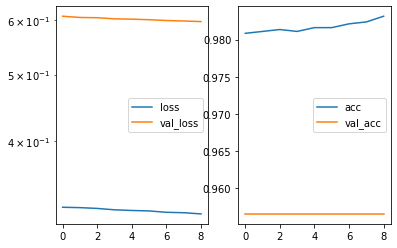

Predicted cell: Cells Probability: [[0.9989644]]
True Cell type: Cells
x [[0.2891908]]
True positional value x 0.5390625
y [[0.3139598]]
True positional value y 0.5


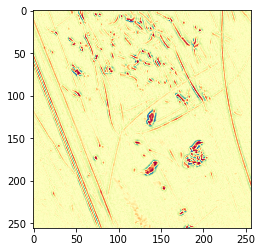

Epoch 10/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3119 - acc: 0.9831 - val_loss: 0.5966 - val_acc: 0.9565

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5965694520208571, 'val_acc': 0.9565217230055068, 'loss': 0.31185346285969123, 'acc': 0.9831374652786528, 'lr': 1e-06}


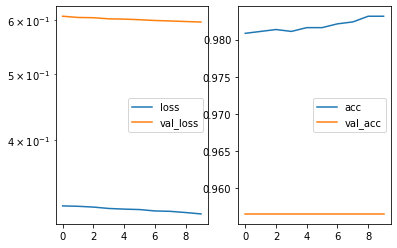

Predicted cell: Cells Probability: [[0.9796429]]
True Cell type: Cells
x [[0.34523806]]
True positional value x 0.4609375
y [[0.5648599]]
True positional value y 0.4609375


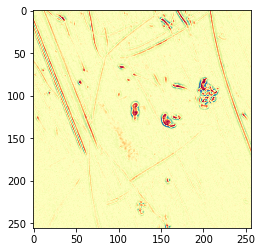

Epoch 11/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.3118 - acc: 0.9826 - val_loss: 0.5950 - val_acc: 0.9565

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5949636513484273, 'val_acc': 0.9565217230055068, 'loss': 0.3117954889212449, 'acc': 0.982626476181851, 'lr': 1e-06}


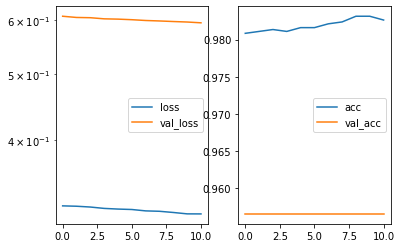

Predicted cell: Cells Probability: [[0.99980336]]
True Cell type: Cells
x [[0.35140547]]
True positional value x 0.5390625
y [[0.23253211]]
True positional value y 0.5


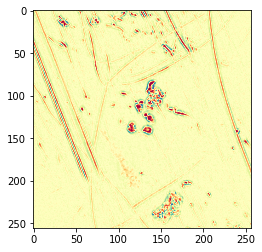

Epoch 12/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.3098 - acc: 0.9839 - val_loss: 0.5944 - val_acc: 0.9565

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.594394240114424, 'val_acc': 0.9565217230055068, 'loss': 0.30981930408114733, 'acc': 0.9839039435177113, 'lr': 1e-06}


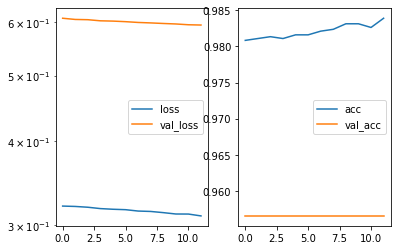

Predicted cell: Cells Probability: [[0.9924999]]
True Cell type: Cells
x [[0.6879094]]
True positional value x 0.4609375
y [[0.3309404]]
True positional value y 0.5390625


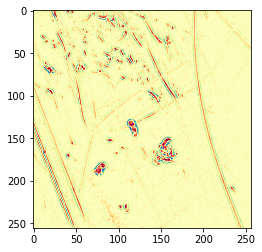

Epoch 13/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.3093 - acc: 0.9844 - val_loss: 0.5928 - val_acc: 0.9565

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5928117437063208, 'val_acc': 0.9565217230055068, 'loss': 0.30929649998536207, 'acc': 0.9844149353251995, 'lr': 1e-06}


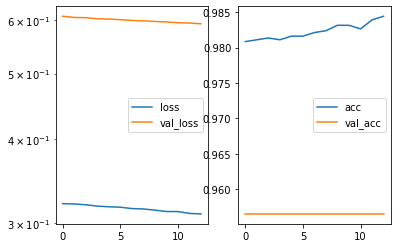

Predicted cell: Cells Probability: [[0.99855214]]
True Cell type: Cells
x [[0.45701712]]
True positional value x 0.4609375
y [[0.6196166]]
True positional value y 0.5


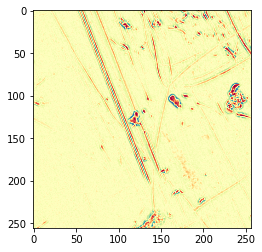

Epoch 14/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.3084 - acc: 0.9847 - val_loss: 0.5915 - val_acc: 0.9565

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5914589301975453, 'val_acc': 0.9565217230055068, 'loss': 0.30840482637781114, 'acc': 0.9846704239496846, 'lr': 1e-06}


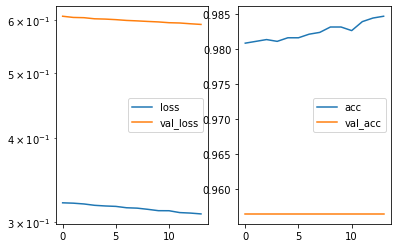

Predicted cell: Cells Probability: [[0.9943634]]
True Cell type: Cells
x [[0.37033364]]
True positional value x 0.5
y [[0.8274428]]
True positional value y 0.5390625


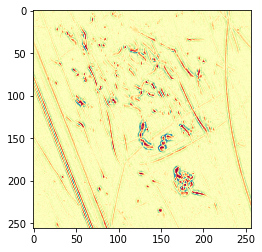

Epoch 15/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.3076 - acc: 0.9859 - val_loss: 0.5902 - val_acc: 0.9565

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5902204110426603, 'val_acc': 0.9565217230055068, 'loss': 0.307595664558206, 'acc': 0.9859478836712572, 'lr': 1e-06}


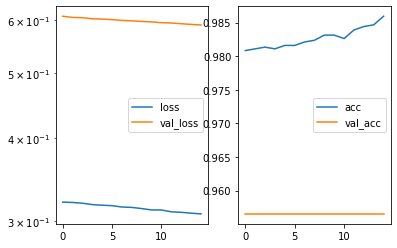

Predicted cell: Cells Probability: [[0.99993026]]
True Cell type: Cells
x [[0.8247334]]
True positional value x 0.5
y [[0.32762915]]
True positional value y 0.4609375


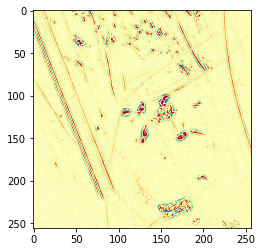

Epoch 16/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.3062 - acc: 0.9852 - val_loss: 0.5892 - val_acc: 0.9614

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5892071453269553, 'val_acc': 0.9613526362727806, 'loss': 0.3061799891578585, 'acc': 0.9851814142343154, 'lr': 1e-06}


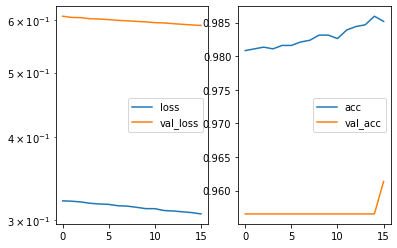

Predicted cell: Cells Probability: [[0.99075305]]
True Cell type: Cells
x [[0.42803317]]
True positional value x 0.4609375
y [[0.36986855]]
True positional value y 0.4609375


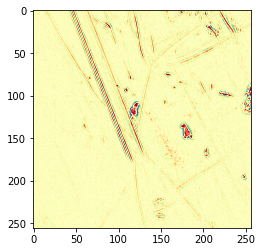

Epoch 17/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3058 - acc: 0.9854 - val_loss: 0.5881 - val_acc: 0.9614

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5881392040114471, 'val_acc': 0.9613526362727806, 'loss': 0.3057912885381302, 'acc': 0.9854368994780567, 'lr': 1e-06}


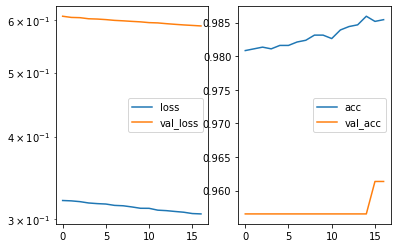

Predicted cell: Cells Probability: [[0.998315]]
True Cell type: Cells
x [[0.29741043]]
True positional value x 0.4609375
y [[0.31310308]]
True positional value y 0.4609375


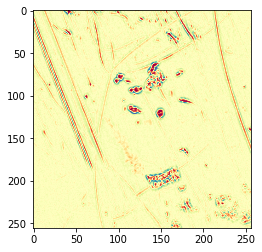

Epoch 18/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3049 - acc: 0.9857 - val_loss: 0.5864 - val_acc: 0.9614

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5864464752915977, 'val_acc': 0.9613526362727806, 'loss': 0.3049064462411507, 'acc': 0.9856923953818008, 'lr': 1e-06}


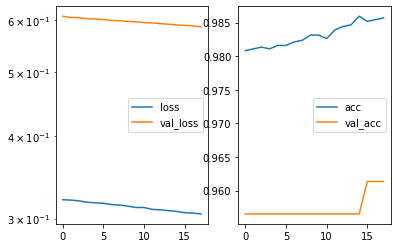

Predicted cell: Cells Probability: [[0.8789261]]
True Cell type: Cells
x [[0.4958445]]
True positional value x 0.4609375
y [[0.24584538]]
True positional value y 0.4609375


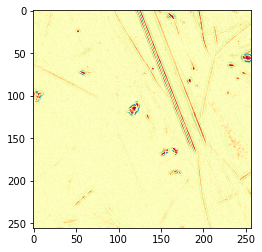

Epoch 19/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3032 - acc: 0.9854 - val_loss: 0.5859 - val_acc: 0.9614

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5858637085859326, 'val_acc': 0.9613526362727806, 'loss': 0.3032263821798986, 'acc': 0.9854369055694868, 'lr': 1e-06}


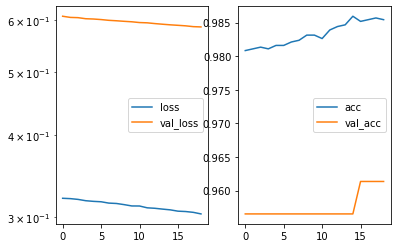

Predicted cell: Cells Probability: [[0.9980101]]
True Cell type: Cells
x [[0.6582341]]
True positional value x 0.5390625
y [[0.3329949]]
True positional value y 0.5390625


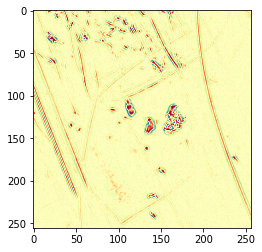

Epoch 20/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3030 - acc: 0.9854 - val_loss: 0.5848 - val_acc: 0.9614

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.584781267216816, 'val_acc': 0.9613526362727806, 'loss': 0.30302136417670583, 'acc': 0.9854369010009142, 'lr': 1e-06}


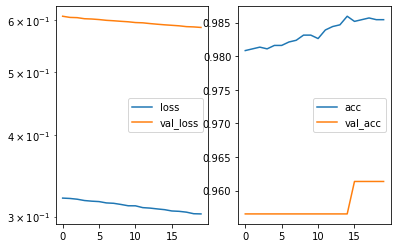

Predicted cell: Cells Probability: [[0.99755645]]
True Cell type: Cells
x [[0.6725316]]
True positional value x 0.5390625
y [[0.4532065]]
True positional value y 0.5390625


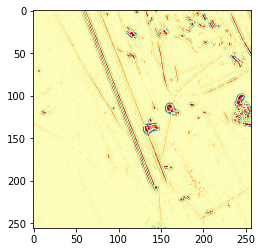

Epoch 21/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3026 - acc: 0.9865 - val_loss: 0.5843 - val_acc: 0.9662

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5842758261639139, 'val_acc': 0.9661835783345688, 'loss': 0.30258250193871217, 'acc': 0.9864588766665744, 'lr': 1e-06}


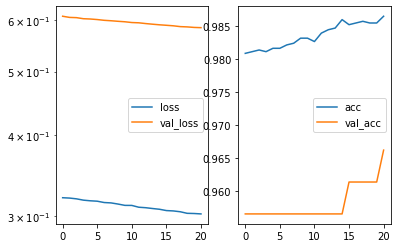

Predicted cell: Cells Probability: [[0.99631965]]
True Cell type: Cells
x [[0.5707345]]
True positional value x 0.4609375
y [[0.5458974]]
True positional value y 0.5390625


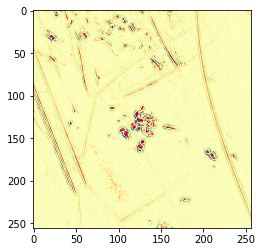

Epoch 22/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3023 - acc: 0.9862 - val_loss: 0.5822 - val_acc: 0.9662

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5822338968659369, 'val_acc': 0.9661835783345688, 'loss': 0.30225849172931335, 'acc': 0.986203384143574, 'lr': 1e-06}


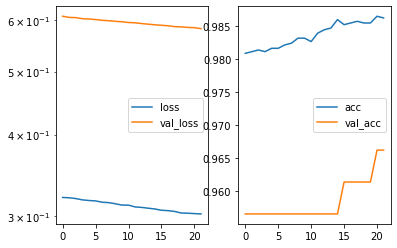

Predicted cell: Cells Probability: [[0.92994344]]
True Cell type: Cells
x [[0.33334234]]
True positional value x 0.5
y [[0.4209486]]
True positional value y 0.5390625


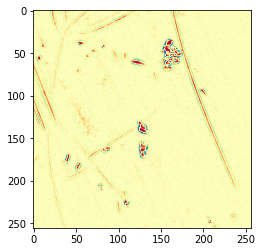

Epoch 23/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.3014 - acc: 0.9870 - val_loss: 0.5804 - val_acc: 0.9662

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5804455654632642, 'val_acc': 0.9661835783345688, 'loss': 0.3013917298632492, 'acc': 0.9869698596719461, 'lr': 1e-06}


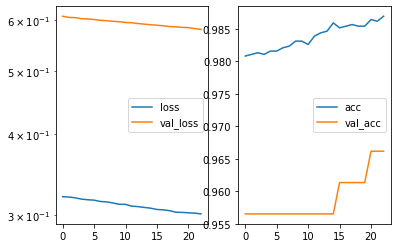

Predicted cell: Cells Probability: [[0.99979085]]
True Cell type: Cells
x [[0.5832905]]
True positional value x 0.5
y [[0.5469953]]
True positional value y 0.5


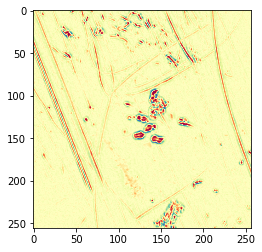

Epoch 24/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.3005 - acc: 0.9885 - val_loss: 0.5800 - val_acc: 0.9662

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5800218394988976, 'val_acc': 0.9661835783345688, 'loss': 0.30052063665526463, 'acc': 0.9885028198658354, 'lr': 1e-06}


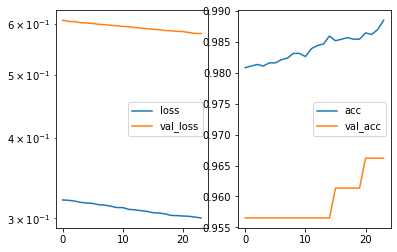

Predicted cell: Normal Probability: [[0.95270324]]
True Cell type: Normal
x [[0.44788972]]
True positional value x 0.5
y [[0.42491546]]
True positional value y 0.5


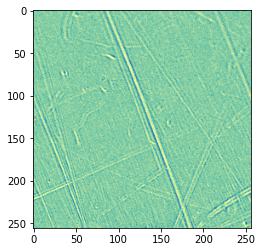

Epoch 25/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2998 - acc: 0.9875 - val_loss: 0.5793 - val_acc: 0.9662

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5793067464505993, 'val_acc': 0.9661835783345688, 'loss': 0.29980596041094604, 'acc': 0.9874808469108617, 'lr': 1e-06}


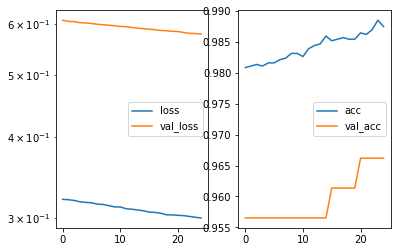

Predicted cell: Cells Probability: [[0.9996972]]
True Cell type: Cells
x [[0.15279913]]
True positional value x 0.5
y [[0.58045065]]
True positional value y 0.5


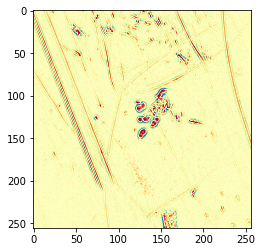

Epoch 26/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2989 - acc: 0.9872 - val_loss: 0.5778 - val_acc: 0.9662

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5778110758693897, 'val_acc': 0.9661835783345688, 'loss': 0.2989155709073442, 'acc': 0.9872253555756901, 'lr': 1e-06}


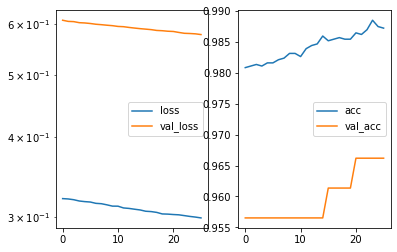

Predicted cell: Cells Probability: [[0.9981025]]
True Cell type: Cells
x [[0.4695866]]
True positional value x 0.5390625
y [[0.2541787]]
True positional value y 0.4609375


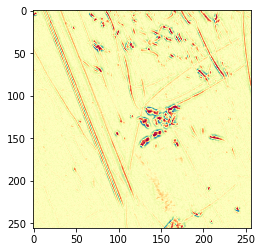

Epoch 27/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2982 - acc: 0.9882 - val_loss: 0.5770 - val_acc: 0.9662

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5769961430254765, 'val_acc': 0.9661835783345688, 'loss': 0.29818023300378005, 'acc': 0.9882473270078064, 'lr': 1e-06}


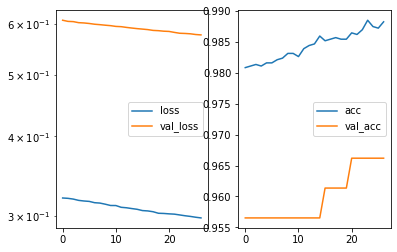

Predicted cell: Normal Probability: [[0.9368045]]
True Cell type: Normal
x [[0.46630707]]
True positional value x 0.5
y [[0.58757967]]
True positional value y 0.5


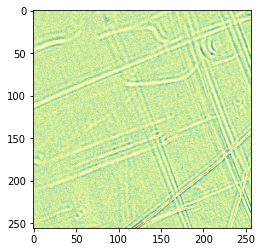

Epoch 28/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2976 - acc: 0.9885 - val_loss: 0.5764 - val_acc: 0.9662

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5763878352976076, 'val_acc': 0.9661835783345688, 'loss': 0.2976290117616122, 'acc': 0.9885028195308068, 'lr': 1e-06}


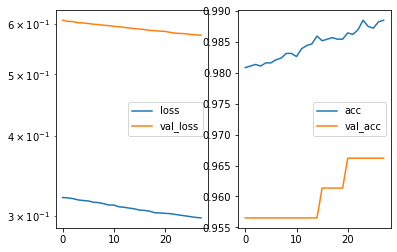

Predicted cell: Cells Probability: [[0.99775237]]
True Cell type: Cells
x [[0.8375146]]
True positional value x 0.4609375
y [[0.595919]]
True positional value y 0.5


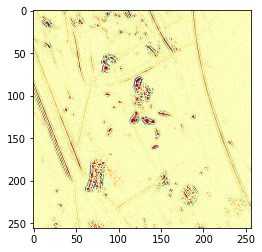

Epoch 29/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2971 - acc: 0.9882 - val_loss: 0.5759 - val_acc: 0.9662

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5759047762207363, 'val_acc': 0.9661835783345688, 'loss': 0.29705173144184577, 'acc': 0.9882473270078064, 'lr': 1e-06}


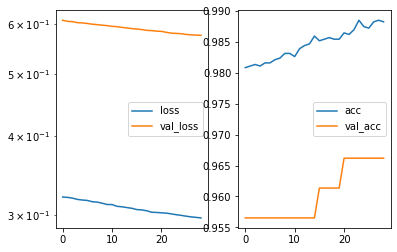

Predicted cell: Cells Probability: [[0.97201806]]
True Cell type: Cells
x [[0.7114683]]
True positional value x 0.5390625
y [[0.64960283]]
True positional value y 0.4609375


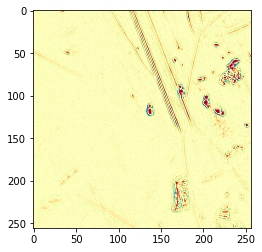

Epoch 30/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2965 - acc: 0.9890 - val_loss: 0.5755 - val_acc: 0.9662

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.575453301558748, 'val_acc': 0.9661835783345688, 'loss': 0.2965084326986031, 'acc': 0.9890138071047511, 'lr': 1e-06}


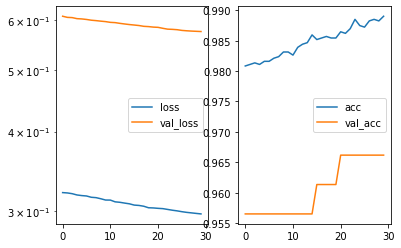

Predicted cell: Cells Probability: [[0.99908423]]
True Cell type: Cells
x [[0.29354954]]
True positional value x 0.5390625
y [[0.32464814]]
True positional value y 0.5


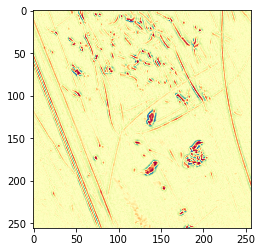

Epoch 31/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.2958 - acc: 0.9885 - val_loss: 0.5746 - val_acc: 0.9662

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5745969964686223, 'val_acc': 0.9661835783345688, 'loss': 0.29582468707706466, 'acc': 0.9885028198658354, 'lr': 1e-06}


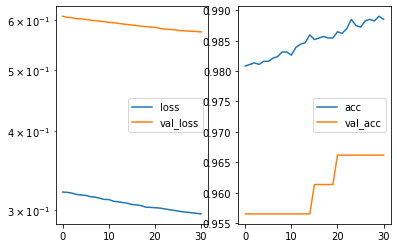

Predicted cell: Cells Probability: [[0.99910575]]
True Cell type: Cells
x [[0.39456922]]
True positional value x 0.4609375
y [[0.29494274]]
True positional value y 0.5


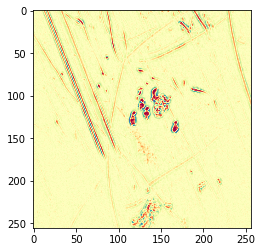

Epoch 32/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2953 - acc: 0.9880 - val_loss: 0.5741 - val_acc: 0.9662

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5740931624375679, 'val_acc': 0.9661835783345688, 'loss': 0.2953023878085595, 'acc': 0.9879918341497773, 'lr': 1e-06}


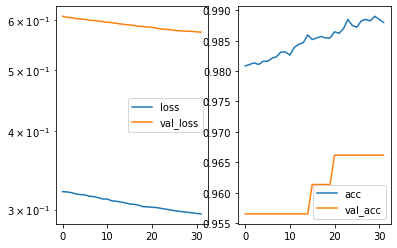

Predicted cell: Cells Probability: [[0.9977804]]
True Cell type: Cells
x [[0.33879054]]
True positional value x 0.5390625
y [[0.38239938]]
True positional value y 0.5


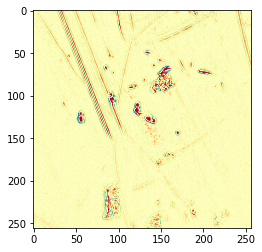

Epoch 33/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2944 - acc: 0.9885 - val_loss: 0.5729 - val_acc: 0.9662

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5728717863847668, 'val_acc': 0.9661835783345688, 'loss': 0.2943589676382838, 'acc': 0.9885028198658354, 'lr': 1e-06}


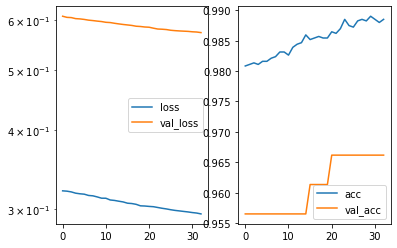

Predicted cell: Cells Probability: [[0.99618703]]
True Cell type: Cells
x [[0.57975876]]
True positional value x 0.4609375
y [[0.5492785]]
True positional value y 0.5390625


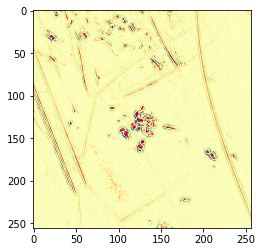

Epoch 34/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2941 - acc: 0.9898 - val_loss: 0.5728 - val_acc: 0.9662

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5727699053460273, 'val_acc': 0.9661835783345688, 'loss': 0.29406870156145853, 'acc': 0.9897802841559806, 'lr': 1e-06}


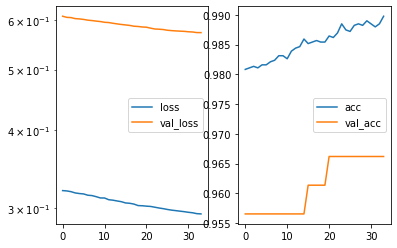

Predicted cell: Cells Probability: [[0.9987907]]
True Cell type: Cells
x [[0.29710662]]
True positional value x 0.4609375
y [[0.3234313]]
True positional value y 0.4609375


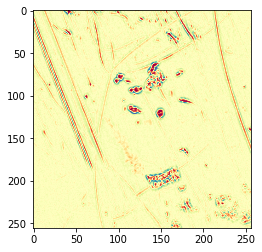

Epoch 35/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.2936 - acc: 0.9895 - val_loss: 0.5722 - val_acc: 0.9662

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5722386120022207, 'val_acc': 0.9661835783345688, 'loss': 0.2935940190030411, 'acc': 0.9895247912979516, 'lr': 1e-06}


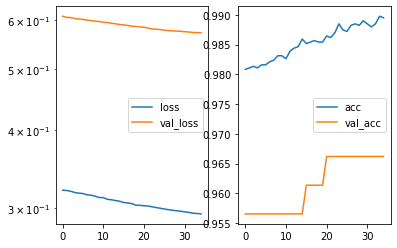

Predicted cell: Cells Probability: [[0.50901467]]
True Cell type: Normal
x [[0.48588932]]
True positional value x 0.5
y [[0.30852672]]
True positional value y 0.5


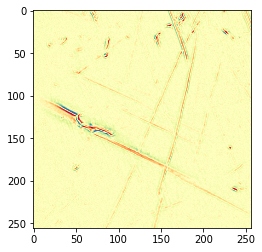

Epoch 36/250
3914/3914 [==============================] - 97s 25ms/step - loss: 0.2930 - acc: 0.9898 - val_loss: 0.5717 - val_acc: 0.9662

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5716797556854101, 'val_acc': 0.9661835783345688, 'loss': 0.29303939979357807, 'acc': 0.9897802856788381, 'lr': 1e-06}


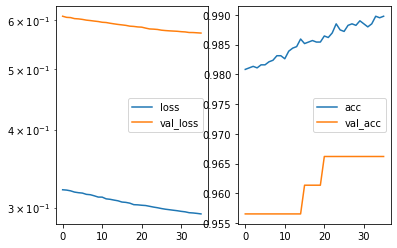

Predicted cell: Cells Probability: [[0.99335164]]
True Cell type: Cells
x [[0.66915244]]
True positional value x 0.5
y [[0.4238247]]
True positional value y 0.4609375


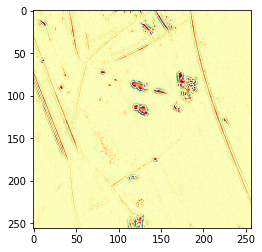

Epoch 37/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2924 - acc: 0.9898 - val_loss: 0.5704 - val_acc: 0.9662

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5704097266934344, 'val_acc': 0.9661835783345688, 'loss': 0.29240743743563163, 'acc': 0.9897802826331231, 'lr': 1e-06}


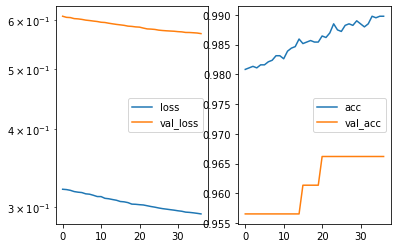

Predicted cell: Cells Probability: [[0.98723906]]
True Cell type: Cells
x [[0.27205968]]
True positional value x 0.5
y [[0.753737]]
True positional value y 0.5


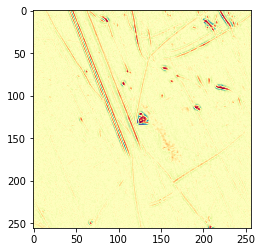

Epoch 38/250
3914/3914 [==============================] - 99s 25ms/step - loss: 0.2921 - acc: 0.9898 - val_loss: 0.5703 - val_acc: 0.9662

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5703262289365133, 'val_acc': 0.9661835783345688, 'loss': 0.29205860868362854, 'acc': 0.9897802841559806, 'lr': 1e-06}


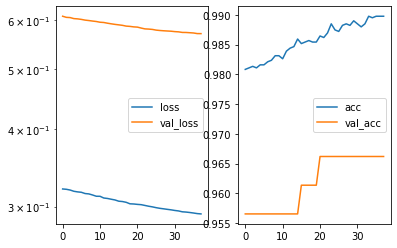

Predicted cell: Cells Probability: [[0.84234226]]
True Cell type: Cells
x [[0.68441737]]
True positional value x 0.5390625
y [[0.43309557]]
True positional value y 0.5


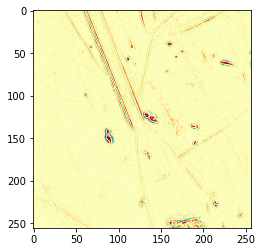

Epoch 39/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2924 - acc: 0.9903 - val_loss: 0.5699 - val_acc: 0.9662

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5699037313461304, 'val_acc': 0.9661835783345688, 'loss': 0.29242728287368386, 'acc': 0.9902912683491811, 'lr': 1e-06}


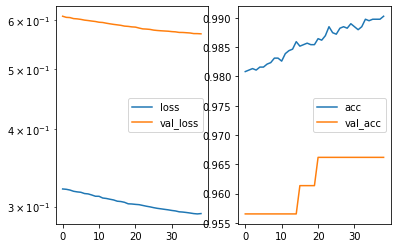

Predicted cell: Cells Probability: [[0.9860101]]
True Cell type: Cells
x [[0.6985565]]
True positional value x 0.5
y [[0.46001172]]
True positional value y 0.5


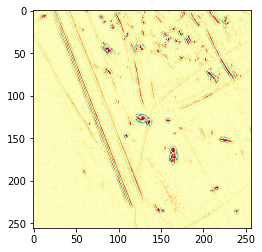

Epoch 40/250
3914/3914 [==============================] - 99s 25ms/step - loss: 0.2909 - acc: 0.9898 - val_loss: 0.5691 - val_acc: 0.9662

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5690599939097529, 'val_acc': 0.9661835783345688, 'loss': 0.2908828433795309, 'acc': 0.9897802856788381, 'lr': 1e-06}


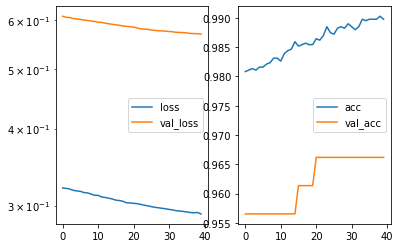

Predicted cell: Cells Probability: [[0.9995103]]
True Cell type: Cells
x [[0.6326451]]
True positional value x 0.5390625
y [[0.46638998]]
True positional value y 0.5390625


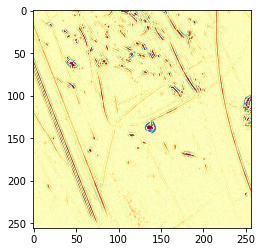

Epoch 41/250
3914/3914 [==============================] - 99s 25ms/step - loss: 0.2910 - acc: 0.9903 - val_loss: 0.5676 - val_acc: 0.9662

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5676012689940595, 'val_acc': 0.9661835783345688, 'loss': 0.2910037506857147, 'acc': 0.9902912698720387, 'lr': 1e-06}


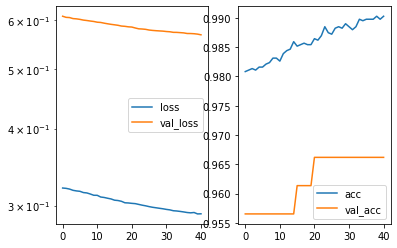

Predicted cell: Cells Probability: [[0.98663527]]
True Cell type: Cells
x [[0.2896111]]
True positional value x 0.4609375
y [[0.5896103]]
True positional value y 0.5


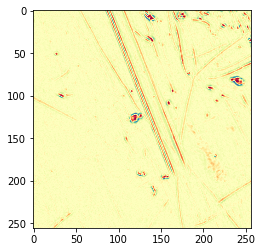

Epoch 42/250
3914/3914 [==============================] - 99s 25ms/step - loss: 0.2908 - acc: 0.9898 - val_loss: 0.5680 - val_acc: 0.9662

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5680237959548471, 'val_acc': 0.9661835783345688, 'loss': 0.2907535815092758, 'acc': 0.9897802841559806, 'lr': 1e-06}


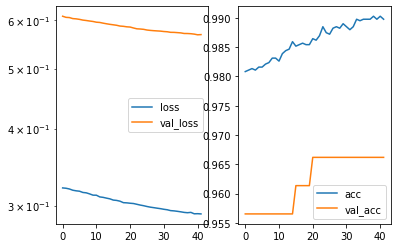

Predicted cell: Cells Probability: [[0.99978465]]
True Cell type: Cells
x [[0.7216244]]
True positional value x 0.5390625
y [[0.46877837]]
True positional value y 0.5390625


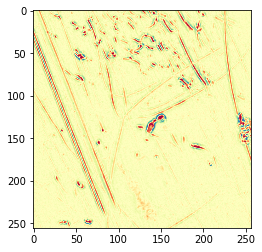

Epoch 43/250
3914/3914 [==============================] - 98s 25ms/step - loss: 0.2900 - acc: 0.9895 - val_loss: 0.5675 - val_acc: 0.9662

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5674657340786883, 'val_acc': 0.9661835783345688, 'loss': 0.2899834765849457, 'acc': 0.9895247928208092, 'lr': 1e-06}


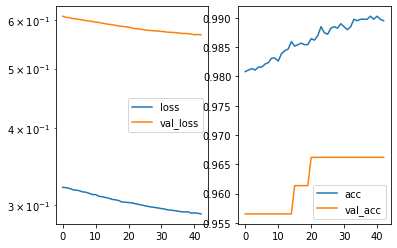

Predicted cell: Cells Probability: [[0.9857313]]
True Cell type: Cells
x [[0.6702341]]
True positional value x 0.4609375
y [[0.23995978]]
True positional value y 0.5390625


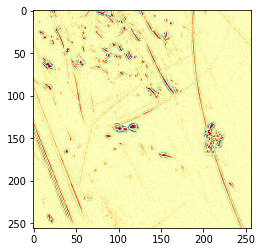

Epoch 44/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2894 - acc: 0.9905 - val_loss: 0.5666 - val_acc: 0.9662

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5665516461727124, 'val_acc': 0.9661835783345688, 'loss': 0.2894475730511992, 'acc': 0.9905467642529253, 'lr': 1e-06}


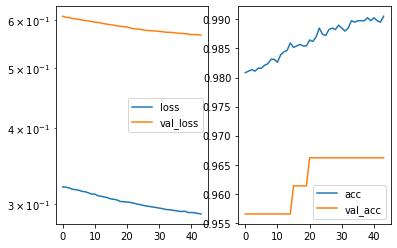

Predicted cell: Cells Probability: [[0.99387014]]
True Cell type: Cells
x [[0.6722336]]
True positional value x 0.5
y [[0.41766948]]
True positional value y 0.4609375


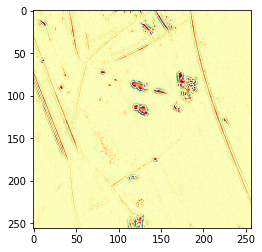

Epoch 45/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2892 - acc: 0.9900 - val_loss: 0.5665 - val_acc: 0.9662

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5664570032110536, 'val_acc': 0.9661835783345688, 'loss': 0.28919616215193705, 'acc': 0.9900357785368672, 'lr': 1e-06}


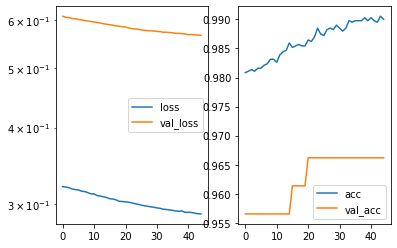

Predicted cell: Normal Probability: [[0.9698882]]
True Cell type: Normal
x [[0.44658542]]
True positional value x 0.5
y [[0.42691755]]
True positional value y 0.5


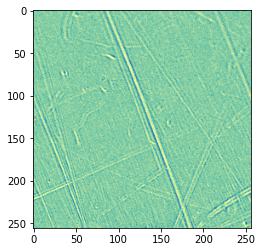

Epoch 46/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2888 - acc: 0.9900 - val_loss: 0.5659 - val_acc: 0.9662

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5658538678418035, 'val_acc': 0.9661835783345688, 'loss': 0.28878044747063625, 'acc': 0.9900357754911521, 'lr': 1e-06}


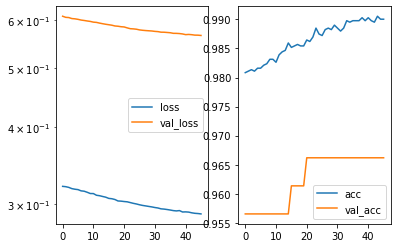

Predicted cell: Cells Probability: [[0.9318931]]
True Cell type: Cells
x [[0.4841004]]
True positional value x 0.4609375
y [[0.24308616]]
True positional value y 0.4609375


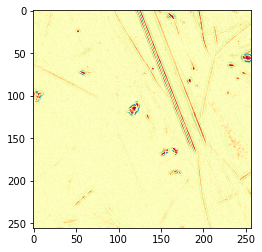

Epoch 47/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2886 - acc: 0.9900 - val_loss: 0.5649 - val_acc: 0.9662

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5648952359738557, 'val_acc': 0.9661835783345688, 'loss': 0.2885939000544648, 'acc': 0.9900357751561234, 'lr': 1e-06}


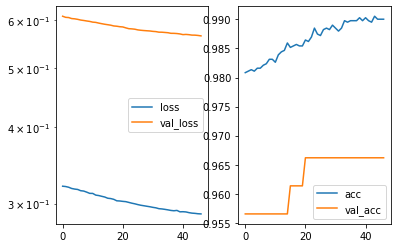

Predicted cell: Cells Probability: [[0.99933845]]
True Cell type: Cells
x [[0.2924032]]
True positional value x 0.4609375
y [[0.6481907]]
True positional value y 0.5390625


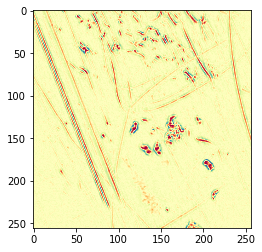

Epoch 48/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2880 - acc: 0.9903 - val_loss: 0.5647 - val_acc: 0.9662

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5646959203452879, 'val_acc': 0.9661835783345688, 'loss': 0.28800512715511684, 'acc': 0.9902912713948963, 'lr': 1e-06}


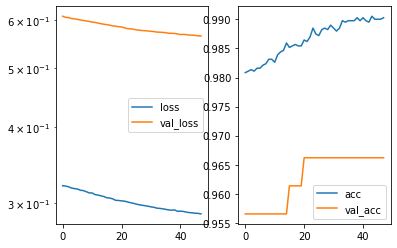

Predicted cell: Cells Probability: [[0.90975404]]
True Cell type: Cells
x [[0.6687838]]
True positional value x 0.4609375
y [[0.24971972]]
True positional value y 0.4609375


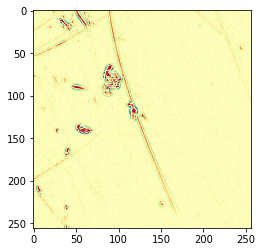

Epoch 49/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2878 - acc: 0.9913 - val_loss: 0.5642 - val_acc: 0.9662

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5642029424220467, 'val_acc': 0.9661835783345688, 'loss': 0.28775442845064825, 'acc': 0.9913132428270125, 'lr': 1e-06}


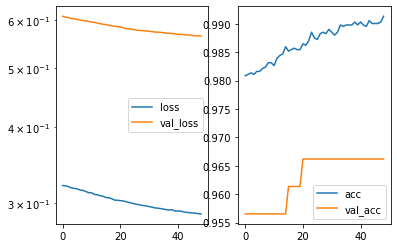

Predicted cell: Cells Probability: [[0.9981857]]
True Cell type: Cells
x [[0.6595711]]
True positional value x 0.4609375
y [[0.7920268]]
True positional value y 0.5390625


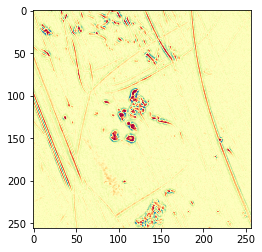

Epoch 50/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2865 - acc: 0.9916 - val_loss: 0.5646 - val_acc: 0.9662

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5645974986795066, 'val_acc': 0.9661835783345688, 'loss': 0.2865339665615138, 'acc': 0.9915687356850416, 'lr': 1e-06}


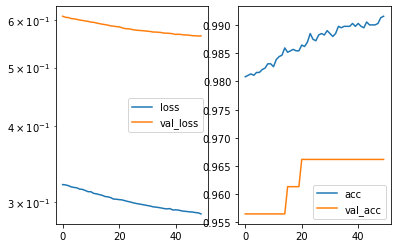

Predicted cell: Cells Probability: [[0.9741124]]
True Cell type: Cells
x [[0.3607697]]
True positional value x 0.4609375
y [[0.47818002]]
True positional value y 0.4609375


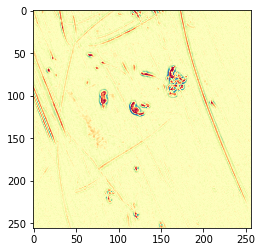

Epoch 51/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2871 - acc: 0.9908 - val_loss: 0.5645 - val_acc: 0.9662

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5644950699691035, 'val_acc': 0.9661835783345688, 'loss': 0.28709188795053175, 'acc': 0.9908022571109544, 'lr': 1e-06}


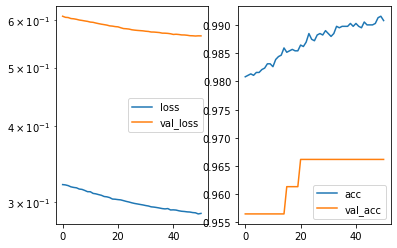

Predicted cell: Cells Probability: [[0.9114392]]
True Cell type: Cells
x [[0.7204335]]
True positional value x 0.4609375
y [[0.35930237]]
True positional value y 0.4609375


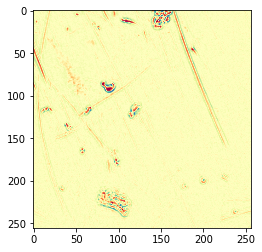

Epoch 52/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2863 - acc: 0.9911 - val_loss: 0.5635 - val_acc: 0.9662

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5635467557515499, 'val_acc': 0.9661835783345688, 'loss': 0.286294342031513, 'acc': 0.9910577499689834, 'lr': 1e-06}


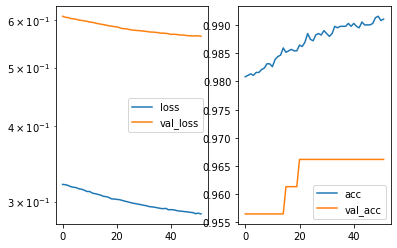

Predicted cell: Cells Probability: [[0.9961468]]
True Cell type: Cells
x [[0.6291867]]
True positional value x 0.4609375
y [[0.40791044]]
True positional value y 0.5390625


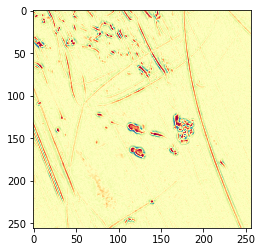

Epoch 53/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2859 - acc: 0.9921 - val_loss: 0.5626 - val_acc: 0.9662

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5625943126885787, 'val_acc': 0.9661835783345688, 'loss': 0.28589968114527864, 'acc': 0.9920797214010996, 'lr': 1e-06}


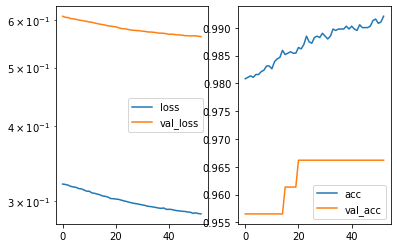

Predicted cell: Cells Probability: [[0.99042237]]
True Cell type: Cells
x [[0.4307737]]
True positional value x 0.4609375
y [[0.4104117]]
True positional value y 0.5


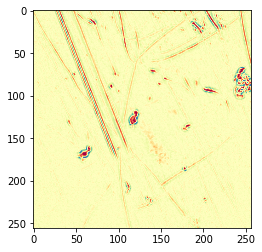

Epoch 54/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2853 - acc: 0.9921 - val_loss: 0.5624 - val_acc: 0.9662

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5624182906703673, 'val_acc': 0.9661835783345688, 'loss': 0.2853482249871041, 'acc': 0.9920797198782421, 'lr': 1e-06}


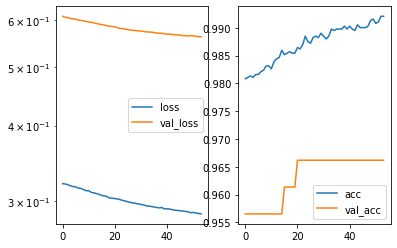

Predicted cell: Normal Probability: [[0.50845546]]
True Cell type: Normal
x [[0.41087386]]
True positional value x 0.5
y [[0.6861625]]
True positional value y 0.5


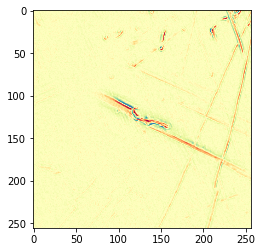

Epoch 55/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2852 - acc: 0.9913 - val_loss: 0.5624 - val_acc: 0.9662

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5624375110087187, 'val_acc': 0.9661835783345688, 'loss': 0.28516588181516134, 'acc': 0.9913132428270125, 'lr': 1e-06}


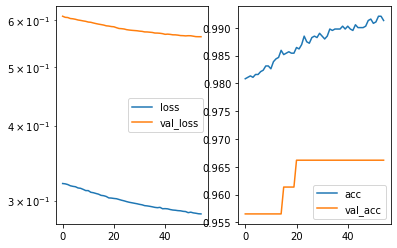

Predicted cell: Cells Probability: [[0.9998103]]
True Cell type: Cells
x [[0.5925314]]
True positional value x 0.5
y [[0.5648876]]
True positional value y 0.5


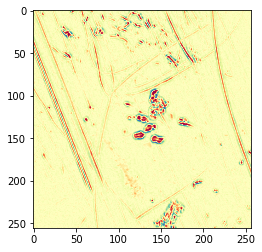

Epoch 56/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2853 - acc: 0.9916 - val_loss: 0.5617 - val_acc: 0.9662

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5617317128296636, 'val_acc': 0.9661835783345688, 'loss': 0.28525922739450943, 'acc': 0.9915687341621839, 'lr': 1e-06}


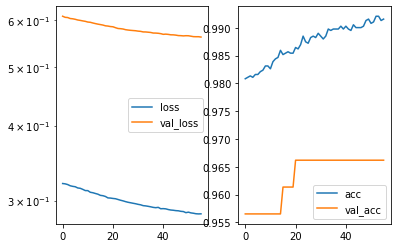

Predicted cell: Cells Probability: [[0.9966534]]
True Cell type: Cells
x [[0.46220315]]
True positional value x 0.4609375
y [[0.49168372]]
True positional value y 0.5


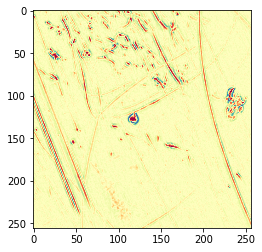

Epoch 57/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2852 - acc: 0.9926 - val_loss: 0.5607 - val_acc: 0.9662

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5606992238961556, 'val_acc': 0.9661835783345688, 'loss': 0.2852438045936881, 'acc': 0.9925907071171577, 'lr': 1e-06}


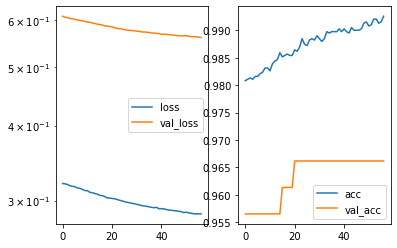

Predicted cell: Cells Probability: [[0.98899895]]
True Cell type: Cells
x [[0.47247487]]
True positional value x 0.5
y [[0.5454613]]
True positional value y 0.4609375


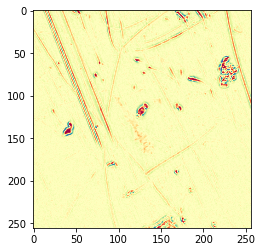

Epoch 58/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2848 - acc: 0.9911 - val_loss: 0.5615 - val_acc: 0.9662

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5615204814551533, 'val_acc': 0.9661835783345688, 'loss': 0.2848284749821491, 'acc': 0.9910577496339548, 'lr': 1e-06}


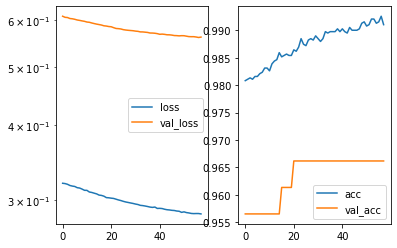

Predicted cell: Cells Probability: [[0.99965715]]
True Cell type: Cells
x [[0.55369484]]
True positional value x 0.4609375
y [[0.52908844]]
True positional value y 0.5


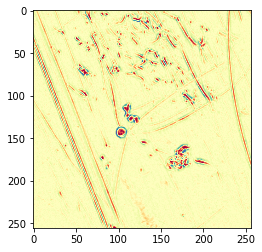

Epoch 59/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2842 - acc: 0.9921 - val_loss: 0.5614 - val_acc: 0.9662

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5614026266595592, 'val_acc': 0.9661835783345688, 'loss': 0.284184678650414, 'acc': 0.9920797214010996, 'lr': 1e-06}


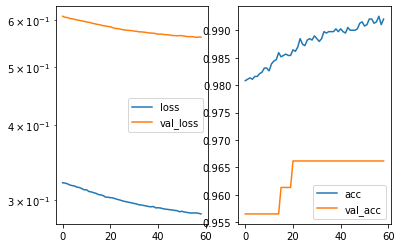

Predicted cell: Cells Probability: [[0.9991811]]
True Cell type: Cells
x [[0.6978404]]
True positional value x 0.5390625
y [[0.33976328]]
True positional value y 0.5


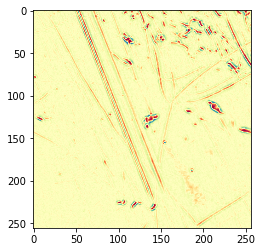

Epoch 60/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2837 - acc: 0.9926 - val_loss: 0.5610 - val_acc: 0.9662

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5609813508204216, 'val_acc': 0.9661835783345688, 'loss': 0.28367947245289854, 'acc': 0.9925907071171577, 'lr': 1e-06}


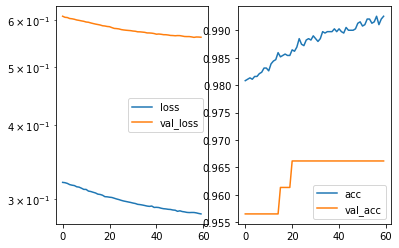

Predicted cell: Cells Probability: [[0.9994325]]
True Cell type: Cells
x [[0.29383004]]
True positional value x 0.4609375
y [[0.6366167]]
True positional value y 0.5390625


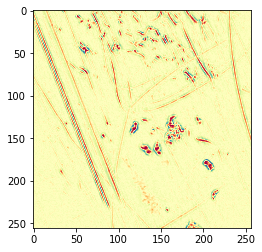

Epoch 61/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2839 - acc: 0.9931 - val_loss: 0.5596 - val_acc: 0.9662

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5595626897282071, 'val_acc': 0.9661835783345688, 'loss': 0.2838768742799637, 'acc': 0.9931016928332158, 'lr': 1e-06}


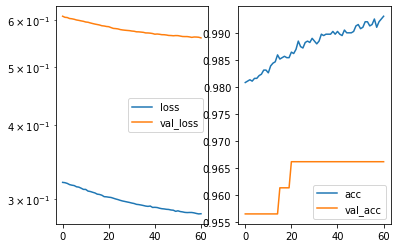

Predicted cell: Cells Probability: [[0.9996904]]
True Cell type: Cells
x [[0.44531664]]
True positional value x 0.5390625
y [[0.695991]]
True positional value y 0.5


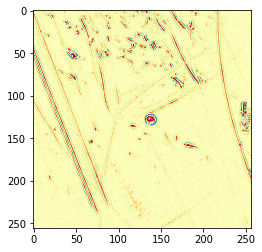

Epoch 62/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2828 - acc: 0.9926 - val_loss: 0.5592 - val_acc: 0.9662

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5591822744567613, 'val_acc': 0.9661835783345688, 'loss': 0.28278511264644596, 'acc': 0.9925907071171577, 'lr': 1e-06}


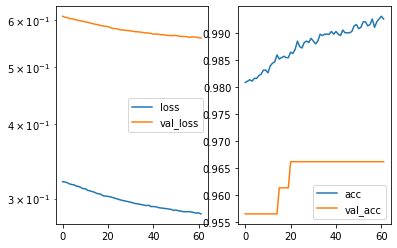

Predicted cell: Cells Probability: [[0.9964056]]
True Cell type: Cells
x [[0.6293834]]
True positional value x 0.4609375
y [[0.41568935]]
True positional value y 0.5390625


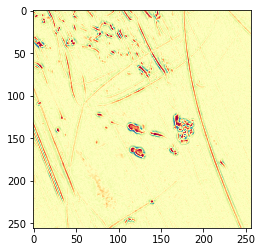

Epoch 63/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2830 - acc: 0.9928 - val_loss: 0.5585 - val_acc: 0.9662

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5584603703540304, 'val_acc': 0.9661835783345688, 'loss': 0.28300768275558186, 'acc': 0.9928461999751867, 'lr': 1e-06}


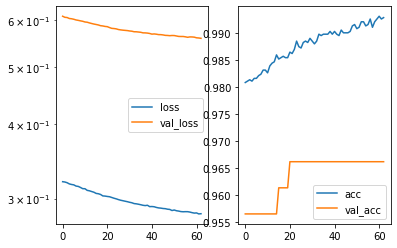

Predicted cell: Cells Probability: [[0.9930133]]
True Cell type: Cells
x [[0.7724257]]
True positional value x 0.5390625
y [[0.6514253]]
True positional value y 0.5


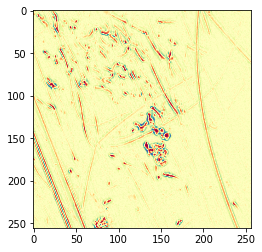

Epoch 64/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2830 - acc: 0.9928 - val_loss: 0.5596 - val_acc: 0.9662

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5596273457946409, 'val_acc': 0.9661835783345688, 'loss': 0.28298009314522427, 'acc': 0.9928461999751867, 'lr': 1e-06}


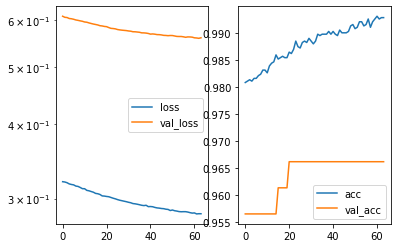

Predicted cell: Cells Probability: [[0.99929905]]
True Cell type: Cells
x [[0.63548696]]
True positional value x 0.5390625
y [[0.30441073]]
True positional value y 0.5390625


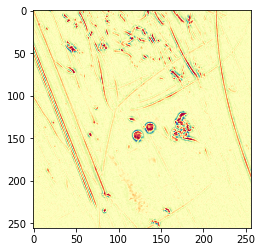

Epoch 65/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2827 - acc: 0.9928 - val_loss: 0.5580 - val_acc: 0.9662

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5579986436931408, 'val_acc': 0.9661835783345688, 'loss': 0.2827304649182467, 'acc': 0.9928461999751867, 'lr': 1e-06}


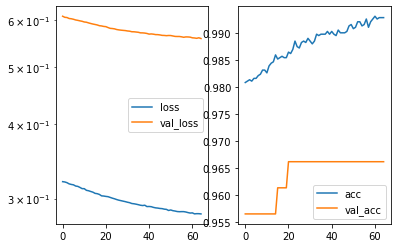

Predicted cell: Cells Probability: [[0.71623755]]
True Cell type: Normal
x [[0.5680202]]
True positional value x 0.5
y [[0.6761275]]
True positional value y 0.5


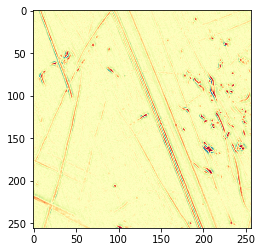

Epoch 66/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2820 - acc: 0.9923 - val_loss: 0.5578 - val_acc: 0.9662

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5578003761848965, 'val_acc': 0.9661835783345688, 'loss': 0.2819574062746279, 'acc': 0.9923352142591286, 'lr': 1e-06}


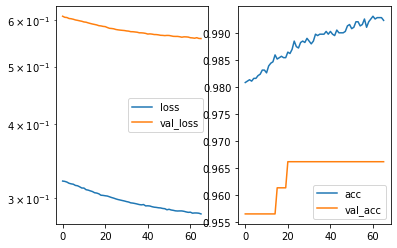

Predicted cell: Cells Probability: [[0.9981206]]
True Cell type: Cells
x [[0.22701594]]
True positional value x 0.4609375
y [[0.3939063]]
True positional value y 0.4609375


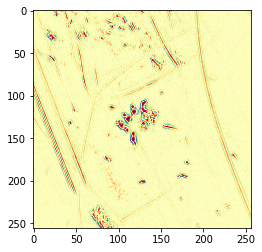

Epoch 67/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2818 - acc: 0.9926 - val_loss: 0.5584 - val_acc: 0.9662

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5583724650207925, 'val_acc': 0.9661835783345688, 'loss': 0.2817672885189144, 'acc': 0.9925907071171577, 'lr': 1e-06}


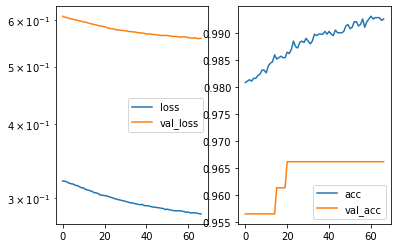

Predicted cell: Cells Probability: [[0.9987208]]
True Cell type: Cells
x [[0.65434706]]
True positional value x 0.5
y [[0.40519404]]
True positional value y 0.5390625


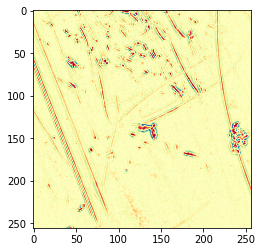

Epoch 68/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2816 - acc: 0.9931 - val_loss: 0.5574 - val_acc: 0.9662

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.557389537781333, 'val_acc': 0.9661835783345688, 'loss': 0.2816409000981262, 'acc': 0.9931016928332158, 'lr': 1e-06}


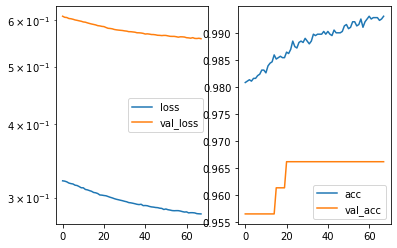

Predicted cell: Cells Probability: [[0.99961]]
True Cell type: Cells
x [[0.35372612]]
True positional value x 0.5390625
y [[0.66517866]]
True positional value y 0.4609375


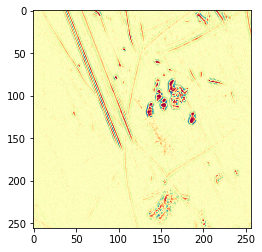

Epoch 69/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2815 - acc: 0.9926 - val_loss: 0.5569 - val_acc: 0.9662

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5568854647558092, 'val_acc': 0.9661835783345688, 'loss': 0.2815273708845196, 'acc': 0.9925907055943002, 'lr': 1e-06}


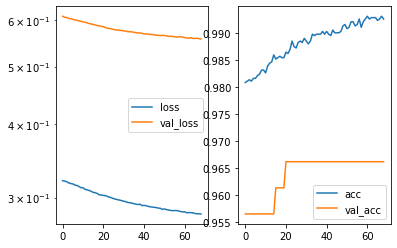

Predicted cell: Cells Probability: [[0.99890006]]
True Cell type: Cells
x [[0.5420278]]
True positional value x 0.5
y [[0.5004823]]
True positional value y 0.5390625


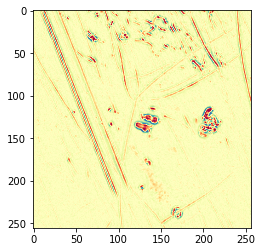

Epoch 70/250
3914/3914 [==============================] - 96s 25ms/step - loss: 0.2810 - acc: 0.9931 - val_loss: 0.5569 - val_acc: 0.9662

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd29ExtraGRAND.h5
{'val_loss': 0.5569059117404735, 'val_acc': 0.9661835783345688, 'loss': 0.28097835315632225, 'acc': 0.9931016928332158, 'lr': 1e-06}


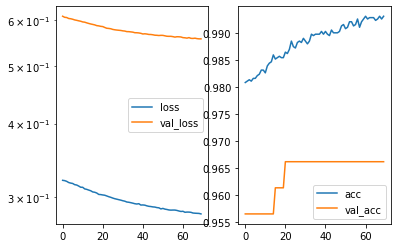

Predicted cell: Cells Probability: [[0.9997008]]
True Cell type: Cells
x [[0.60875624]]
True positional value x 0.5
y [[0.25244045]]
True positional value y 0.4609375


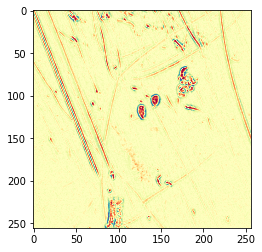

Epoch 71/250
1400/3914 [=========>....................] - ETA: 1:01 - loss: 0.2816 - acc: 0.9929

In [ ]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
